In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df=pd.read_csv('winequality-white.csv',sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [15]:
df.shape

(4898, 12)

In [16]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(937)

In [18]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(3961, 12)

In [20]:
df.skew()

fixed acidity           0.696100
volatile acidity        1.641081
citric acid             1.310601
residual sugar          1.333639
chlorides               4.969076
free sulfur dioxide     1.566680
total sulfur dioxide    0.456800
density                 1.273318
pH                      0.455457
sulphates               0.937853
alcohol                 0.450697
quality                 0.112004
dtype: float64

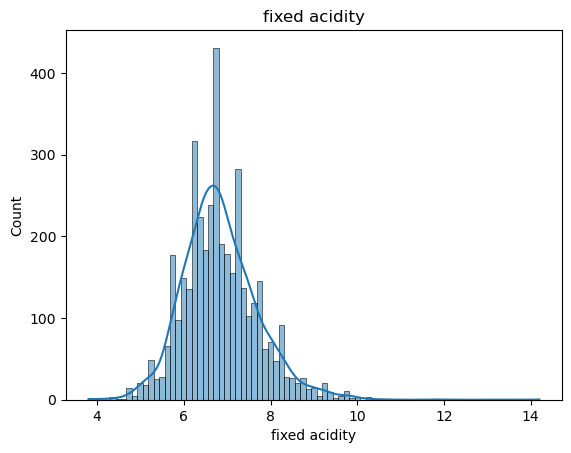

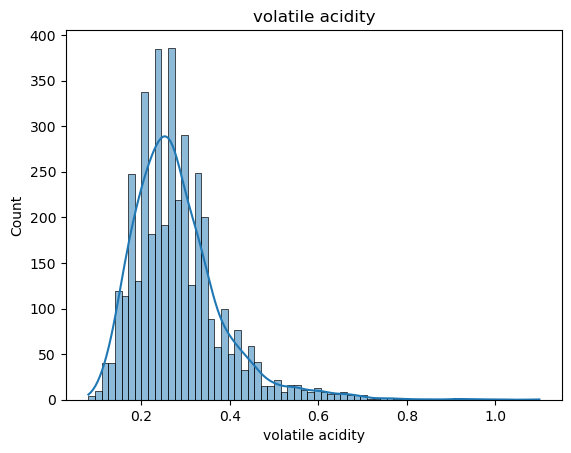

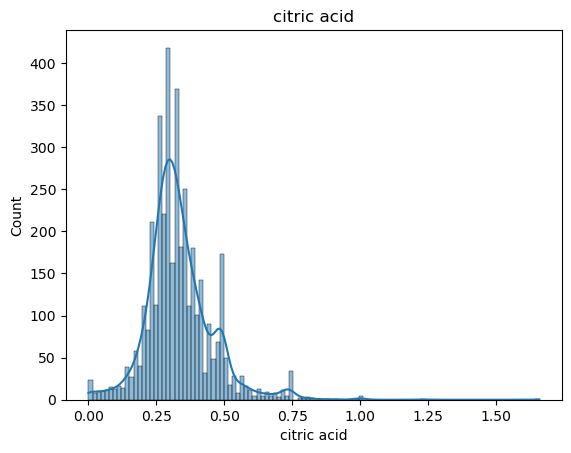

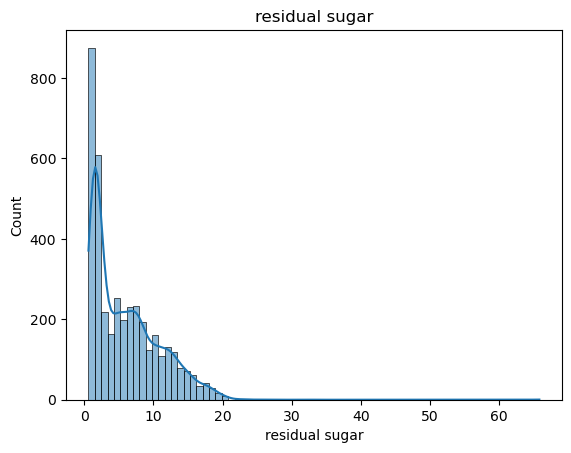

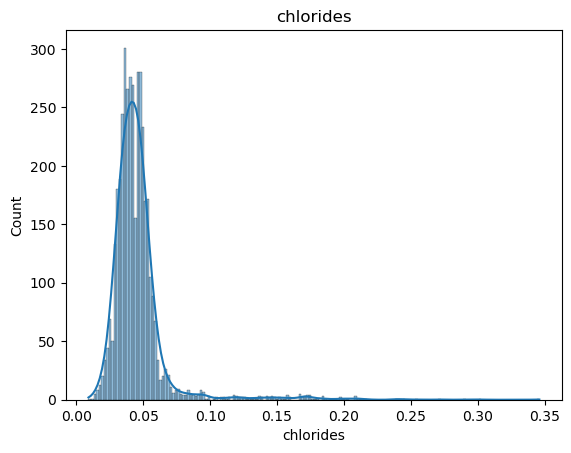

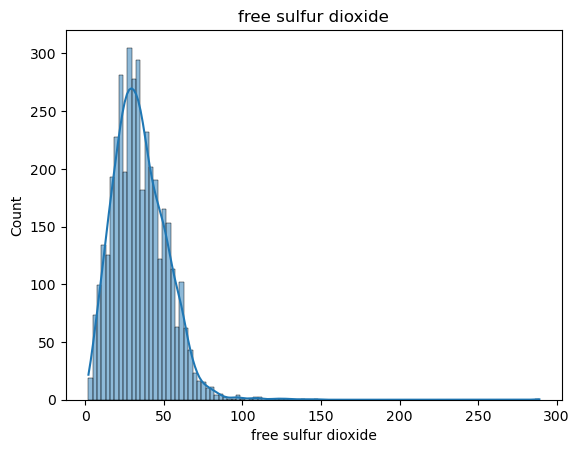

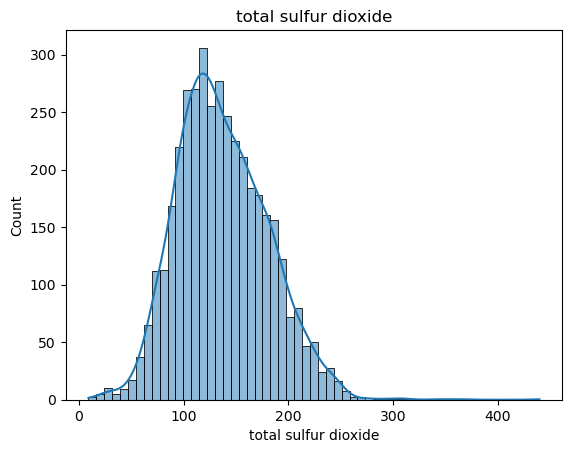

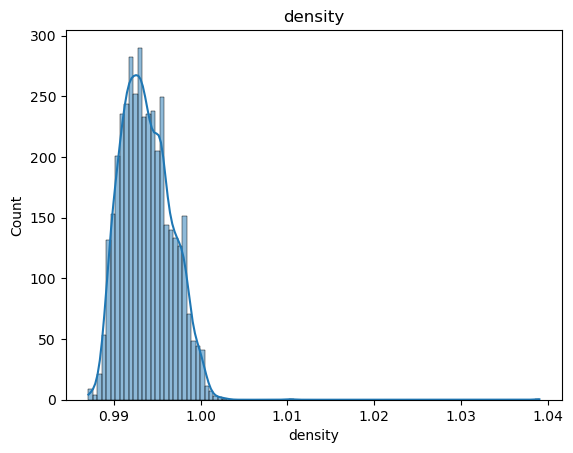

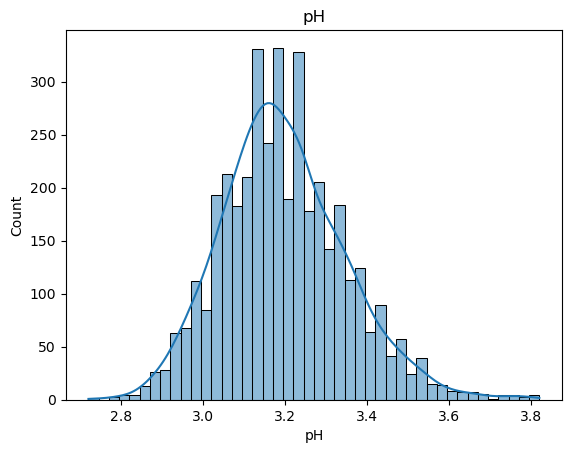

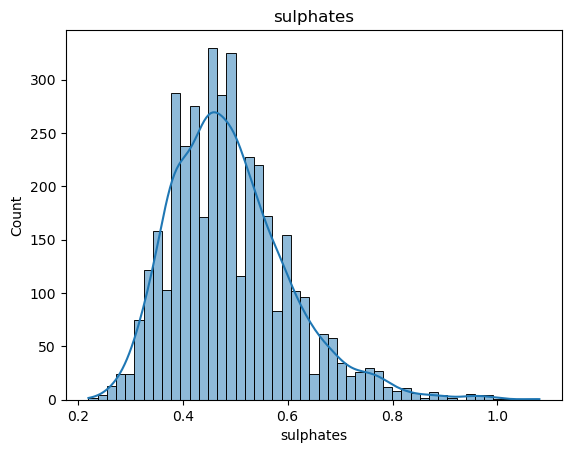

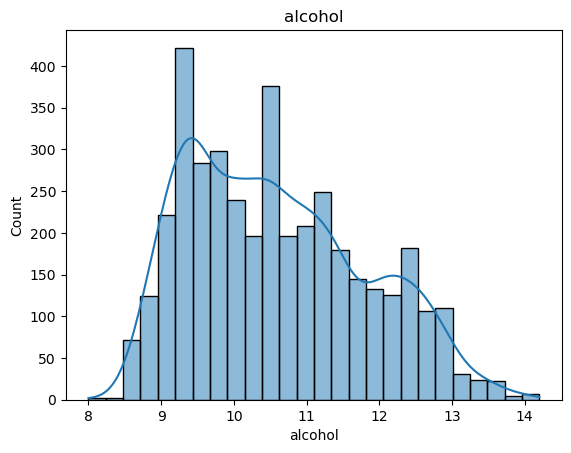

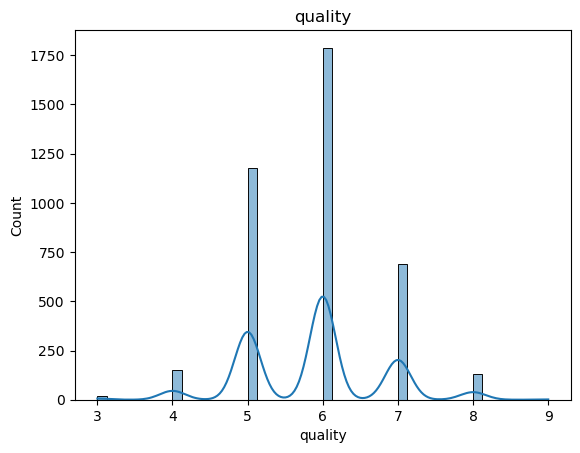

In [21]:
for col in df.columns: 
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

In [22]:
df['residual sugar'] = np.log1p(df['residual sugar'])  
df['chlorides'] = np.log1p(df['chlorides'])  

C:\Users\kavin\AppData\Local\Temp\ipykernel_30412\2188349036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual sugar'] = np.log1p(df['residual sugar'])
C:\Users\kavin\AppData\Local\Temp\ipykernel_30412\2188349036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chlorides'] = np.log1p(df['chlorides'])


0.11212218768420937


<Axes: xlabel='residual sugar', ylabel='Count'>

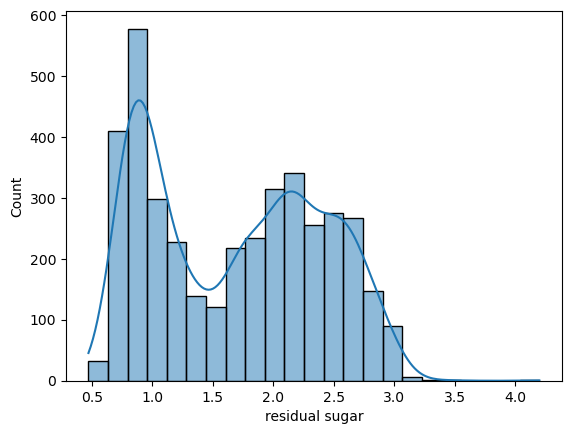

In [23]:
print(df['residual sugar'].skew())
sns.histplot(df['residual sugar'],kde=True)

4.593756270544397


<Axes: xlabel='chlorides', ylabel='Count'>

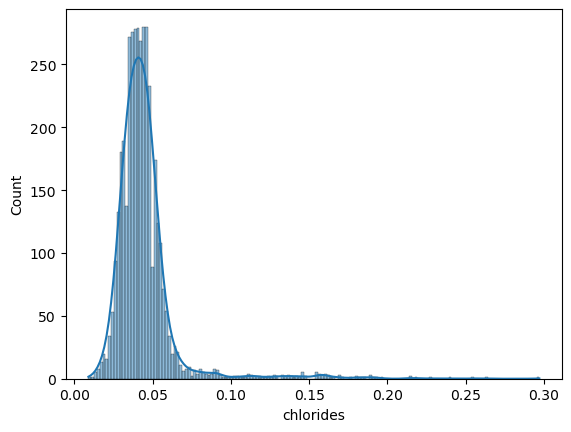

In [24]:
print(df['chlorides'].skew())
sns.histplot(df['chlorides'],kde=True)

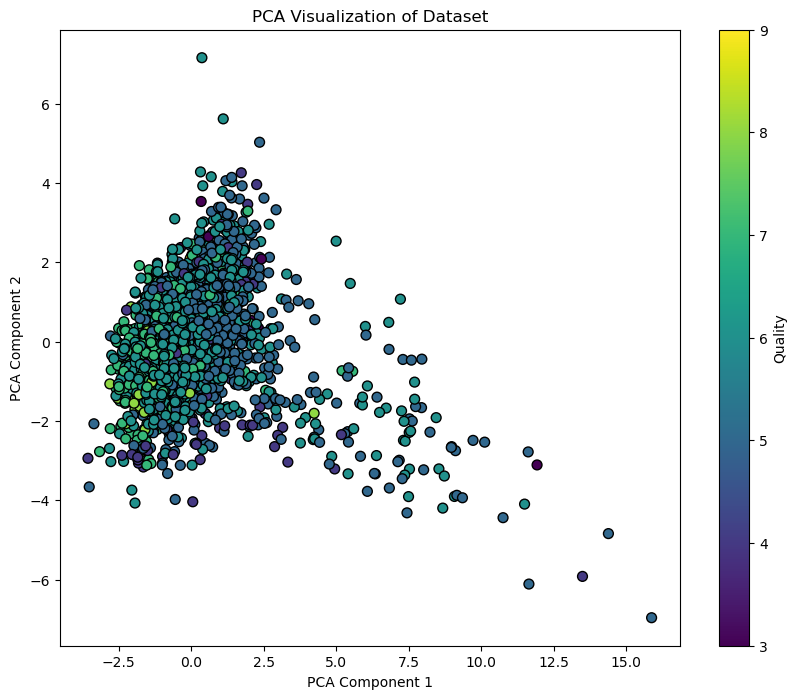

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

X=df.drop("quality",axis=1)
y=df['quality']

scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y , edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Dataset')
cbar = plt.colorbar(scatter)
cbar.set_label('Quality')
plt.show()